<a href="https://colab.research.google.com/github/trq11137/ml-web-ap2/blob/main/Project_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os
import xgboost
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline





In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Dataset import


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset-of-Diabetes.csv") 

In [5]:


df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [6]:
df['CLASS'].value_counts()


Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [8]:
df['CLASS'] = df['CLASS'].str.replace("N ","N")

In [9]:
df['CLASS'] = df['CLASS'].str.replace("Y ","Y")

In [10]:
df['Gender'] = df['Gender'].str.replace("f","F")

In [11]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df.CLASS= le.fit_transform(df.CLASS.values)
df.Gender= le.fit_transform(df.Gender.values)

In [15]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


In [17]:
df.describe()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.565000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,1.741000
std,240.397673,3.380758e+06,0.496005,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.631124
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,300.500000,3.439550e+04,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,2.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


Visualizing aspects of the **dataset**

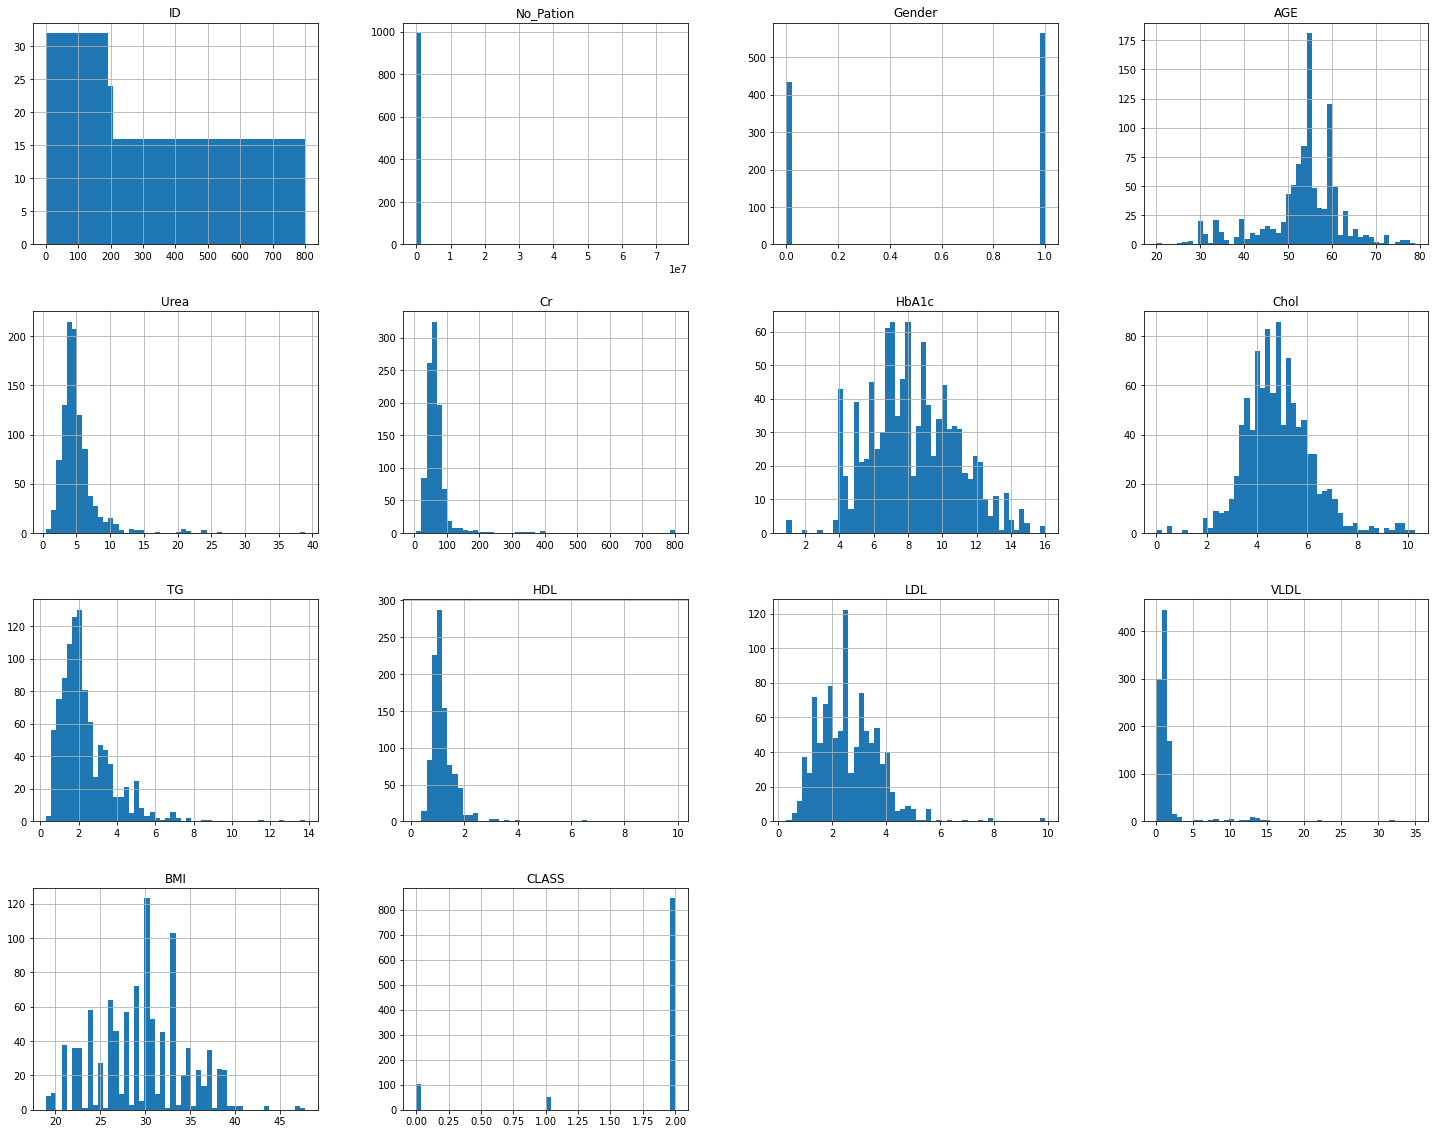

In [18]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

# **Removing duplicated data points**

In [19]:
df.drop_duplicates(keep='first', inplace=True)

**Creating a test set**

In [20]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy() 

# **Gaining further insight**

In [21]:
correlation_matrix = train_df.corr(method='pearson')

correlation_matrix 

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,1.000000,0.080304,0.017841,-0.081246,-0.109712,-0.103283,-0.004181,0.031795,-0.068068,-0.002157,-0.048647,0.159604,0.068017,-0.069073
No_Pation,0.080304,1.000000,0.058607,-0.095456,-0.022343,0.002664,-0.037307,-0.037349,-0.046188,-0.013227,-0.011073,0.125459,0.018251,-0.053226
Gender,0.017841,0.058607,1.000000,0.005736,0.119839,0.171559,-0.016626,-0.058824,0.067125,-0.140129,0.061187,0.198154,0.052851,0.104041
AGE,-0.081246,-0.095456,0.005736,1.000000,0.116069,0.050631,0.390051,0.060686,0.155633,-0.013739,0.039685,-0.082123,0.380410,0.477875
Urea,-0.109712,-0.022343,0.119839,0.116069,1.000000,0.590423,-0.025838,0.032121,0.054922,-0.033037,0.004494,-0.017880,0.039250,0.064533
Cr,-0.103283,0.002664,0.171559,0.050631,0.590423,1.000000,-0.052134,0.017238,0.090518,-0.014727,0.057960,0.023692,0.051878,0.038766
HbA1c,-0.004181,-0.037307,-0.016626,0.390051,-0.025838,-0.052134,1.000000,0.185185,0.244573,0.032475,0.022449,0.076426,0.420063,0.559631
Chol,0.031795,-0.037349,-0.058824,0.060686,0.032121,0.017238,0.185185,1.000000,0.315232,0.075359,0.411457,0.090551,0.017735,0.154167
TG,-0.068068,-0.046188,0.067125,0.155633,0.054922,0.090518,0.244573,0.315232,1.000000,-0.091940,0.023204,0.147834,0.131607,0.196936
HDL,-0.002157,-0.013227,-0.140129,-0.013739,-0.033037,-0.014727,0.032475,0.075359,-0.091940,1.000000,-0.141708,-0.064954,0.075032,-0.003389


In [22]:
correlation_matrix["CLASS"].sort_values()


ID          -0.069073
No_Pation   -0.053226
HDL         -0.003389
LDL          0.012967
Cr           0.038766
Urea         0.064533
VLDL         0.103604
Gender       0.104041
Chol         0.154167
TG           0.196936
AGE          0.477875
HbA1c        0.559631
BMI          0.586967
CLASS        1.000000
Name: CLASS, dtype: float64

Handling missing data

In [23]:
names = ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

for name in names:
    train_df[name].replace(0, np.nan, inplace=True)

In [24]:
train_df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
438,238,344454,1.0,60,4.0,63,12.0,3.6,5.1,0.9,2.5,0.9,30.0,2
853,11,749215,NaN,42,2.3,52,7.0,5.2,2.8,3.1,1.3,0.9,24.0,2
160,39,23984,1.0,45,5.3,77,11.2,3.9,1.5,1.3,2.0,10.4,29.5,2
40,746,34299,NaN,45,4.7,31,4.8,3.8,0.7,1.3,2.2,0.3,24.0,0
35,703,34248,NaN,39,6.0,67,4.0,4.0,0.6,1.1,2.6,0.3,22.0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 117.2 KB


In [26]:
id_median = train_df["ID"].median()
no_pation_median = train_df["No_Pation"].median()
gender_median = train_df["Gender"].median()
age_median = train_df["AGE"].median()
urea_median = train_df["Urea"].median()
cr_median = train_df["Cr"].median()
hba1c_median = train_df['HbA1c'].median()
chol_median = train_df['Chol'].median()
tg_median = train_df['TG'].median()
hdl_median = train_df['HDL'].median()
ldl_median = train_df['LDL'].median()
vldl_median = train_df['VLDL'].median()
bmi_median = train_df['BMI'].median()

train_df["ID"].fillna(id_median, inplace=True)
train_df["No_Pation"].fillna(no_pation_median, inplace=True)
train_df["Gender"].fillna(gender_median, inplace=True)
train_df["AGE"].fillna(age_median, inplace=True)
train_df["Urea"].fillna(urea_median, inplace=True)
train_df["Cr"].fillna(cr_median, inplace=True)
train_df["HbA1c"].fillna(hba1c_median, inplace=True)
train_df["Chol"].fillna(chol_median, inplace=True)
train_df["TG"].fillna(tg_median, inplace=True)
train_df["HDL"].fillna(hdl_median, inplace=True)
train_df["LDL"].fillna(ldl_median, inplace=True)
train_df["VLDL"].fillna(vldl_median, inplace=True)
train_df["BMI"].fillna(bmi_median, inplace=True)

In [27]:
train_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
438,238,344454,1.0,60,4.0,63,12.0,3.6,5.1,0.9,2.5,0.9,30.0,2
853,11,749215,1.0,42,2.3,52,7.0,5.2,2.8,3.1,1.3,0.9,24.0,2
160,39,23984,1.0,45,5.3,77,11.2,3.9,1.5,1.3,2.0,10.4,29.5,2
40,746,34299,1.0,45,4.7,31,4.8,3.8,0.7,1.3,2.2,0.3,24.0,0
35,703,34248,1.0,39,6.0,67,4.0,4.0,0.6,1.1,2.6,0.3,22.0,0


**Encoding categorial attributes**

In [28]:
# Copy original dataframe and add new column with random fitness values
temp_df = train_df.copy()
fitness_values = ["bad", "moderate", "good", "very good",]
temp_df['fitness'] = np.random.choice(fitness_values, temp_df.shape[0])

temp_df.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,fitness
438,238,344454,1.0,60,4.0,63,12.0,3.6,5.1,0.9,2.5,0.9,30.0,2,moderate
853,11,749215,1.0,42,2.3,52,7.0,5.2,2.8,3.1,1.3,0.9,24.0,2,moderate
160,39,23984,1.0,45,5.3,77,11.2,3.9,1.5,1.3,2.0,10.4,29.5,2,moderate
40,746,34299,1.0,45,4.7,31,4.8,3.8,0.7,1.3,2.2,0.3,24.0,0,bad
35,703,34248,1.0,39,6.0,67,4.0,4.0,0.6,1.1,2.6,0.3,22.0,0,very good


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
fitness_encoded = encoder.fit_transform(temp_df["fitness"])

for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded fitness values for first 10 entries: {fitness_encoded[:10]}")

class id 0 has label bad
class id 1 has label good
class id 2 has label moderate
class id 3 has label very good

Encoded fitness values for first 10 entries: [2 2 2 0 3 0 3 1 0 1]


**Rescaling or standardizing attributes**

In [30]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

# transform all attributes
temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])

temp1_df.sort_index(inplace=True)
temp1_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,0.918648,0.000452,0.0,0.101695,0.104167,0.070529,0.264901,0.326531,0.067669,0.092784,0.187500,0.011494,0.139130,0.0
2,0.524406,0.000634,0.0,0.508475,0.109375,0.050378,0.264901,0.377551,0.030075,0.226804,0.114583,0.008621,0.173913,0.0
3,0.849812,0.001160,0.0,0.508475,0.109375,0.050378,0.264901,0.377551,0.030075,0.226804,0.114583,0.008621,0.173913,0.0
4,0.629537,0.000452,0.0,0.220339,0.171875,0.050378,0.264901,0.448980,0.037594,0.061856,0.177083,0.005747,0.069565,0.0
5,0.792240,0.000452,0.0,0.423729,0.046875,0.022670,0.205298,0.244898,0.037594,0.082474,0.125000,0.005747,0.069565,0.0


In [31]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_df = train_df.copy()

# transform all attributes
temp2_df[column_names] = mm_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,0.918648,0.000452,0.0,0.101695,0.104167,0.070529,0.264901,0.326531,0.067669,0.092784,0.187500,0.011494,0.139130,0.0
2,0.524406,0.000634,0.0,0.508475,0.109375,0.050378,0.264901,0.377551,0.030075,0.226804,0.114583,0.008621,0.173913,0.0
3,0.849812,0.001160,0.0,0.508475,0.109375,0.050378,0.264901,0.377551,0.030075,0.226804,0.114583,0.008621,0.173913,0.0
4,0.629537,0.000452,0.0,0.220339,0.171875,0.050378,0.264901,0.448980,0.037594,0.061856,0.177083,0.005747,0.069565,0.0
5,0.792240,0.000452,0.0,0.423729,0.046875,0.022670,0.205298,0.244898,0.037594,0.082474,0.125000,0.005747,0.069565,0.0


In [32]:
df['CLASS'].value_counts()

2    844
0    103
1     53
Name: CLASS, dtype: int64

In [33]:
df.groupby('CLASS').mean()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
CLASS,,,,,,,,,,,,,
0,368.252427,815851.990291,0.378641,44.233010,4.680583,62.796117,4.560194,4.268932,1.625243,1.227184,2.625243,0.943689,22.374757
1,396.056604,64299.037736,0.679245,43.283019,4.511321,66.075472,6.003774,4.579245,2.126415,1.127358,2.493396,0.983019,23.933962
2,333.624408,216955.928910,0.580569,55.305687,5.217468,69.873223,8.878270,4.953104,2.452026,1.206872,2.615213,2.020616,30.811517


In [34]:
X = df.drop( 'CLASS', axis=1)


In [35]:
print(X)

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  
0    24.0  
1    23.0  
2  

In [36]:
y = df['CLASS']

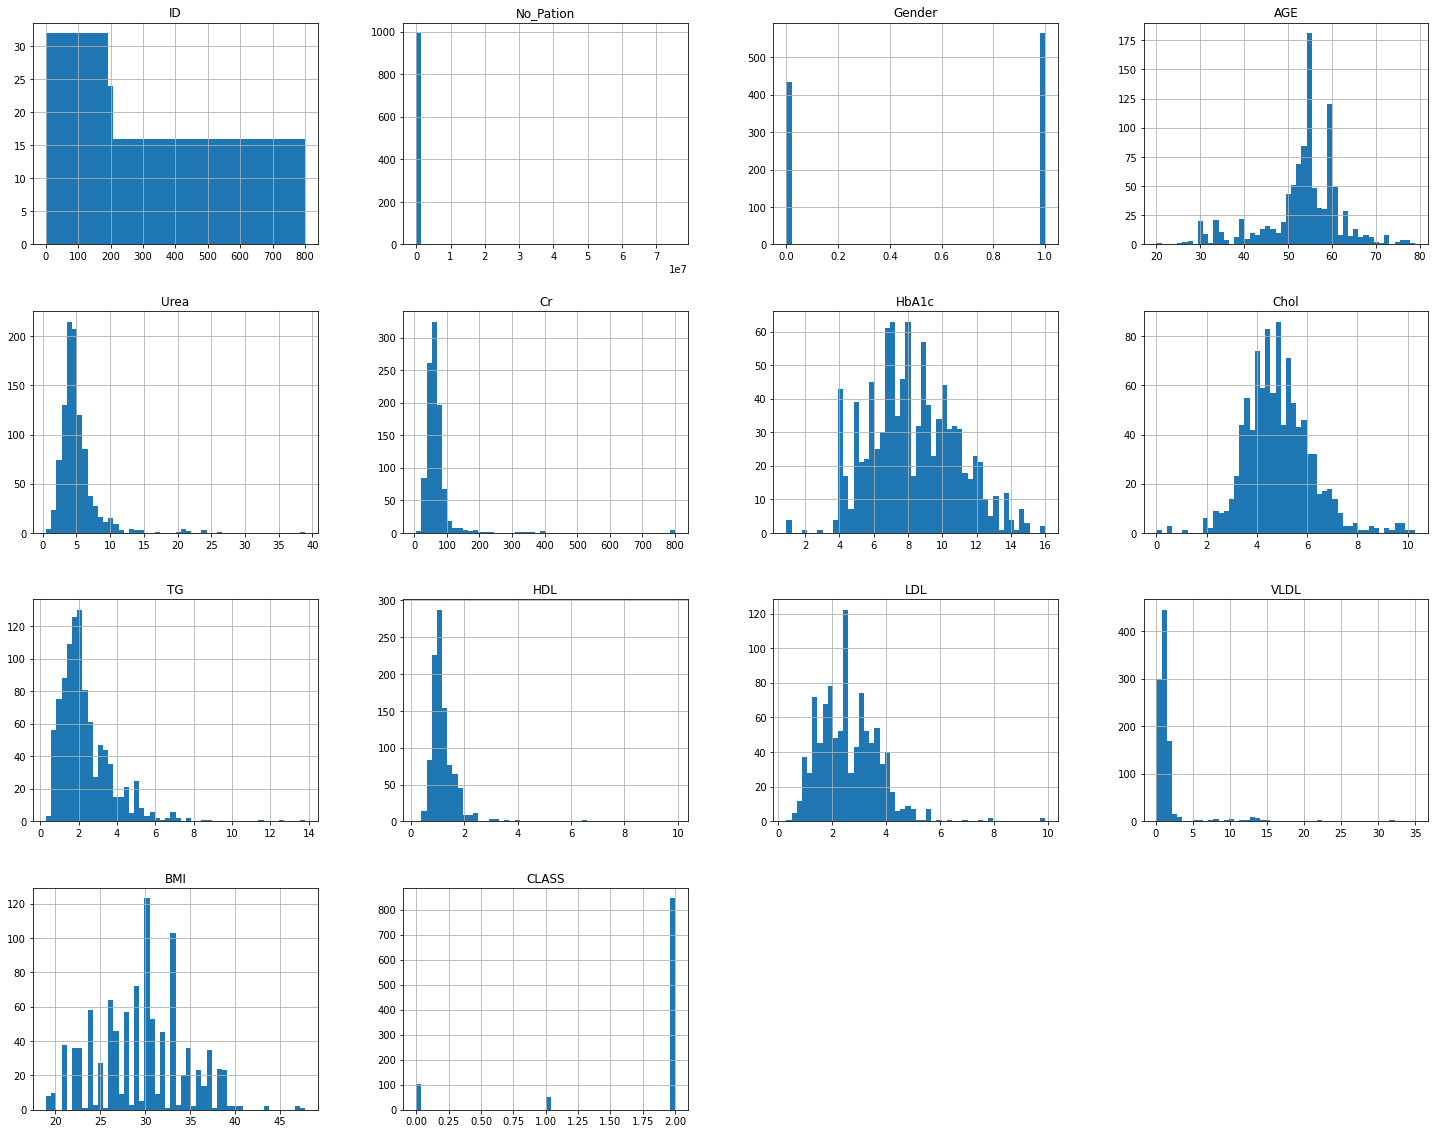

In [37]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score

In [39]:
from xgboost import XGBClassifier


In [40]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [42]:
model.fit(X_train, y_train)


XGBClassifier(eval_metric='mlogloss', objective='multi:softprob',
              use_label_encoder=False)

In [43]:
y_pred = model.predict(X_test)


In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.99


In [45]:
recall = recall_score(y_test, y_pred,average='micro')
print(recall)

0.99


[[ 15   0   1]
 [  0   7   1]
 [  0   0 176]]


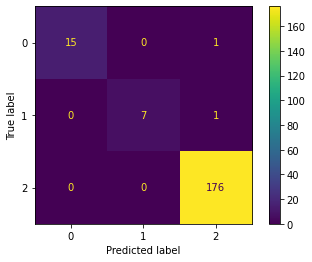

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [47]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      0.99       176

    accuracy                           0.99       200
   macro avg       1.00      0.94      0.97       200
weighted avg       0.99      0.99      0.99       200



ADAboost algorithm used

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [49]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [50]:
model = abc.fit(X_train, y_train)

In [51]:
model.score(X_train, y_train)

0.95875

In [52]:
model.score(X_test, y_test)

0.955

In [53]:
y_pred = model.predict(X_test)



In [54]:
print(accuracy_score(y_test, y_pred))

0.955


In [55]:
recall=metrics.recall_score(y_test, y_pred, average='micro')
pre=metrics.precision_score(y_test, y_pred, average='macro')
f1=metrics.f1_score(y_test, y_pred, average='weighted')


In [56]:
print('recall=',recall)
print('precision=',pre)
print('f1=',f1)


recall= 0.955
precision= 0.823529411764706
f1= 0.9625096209912536


In [57]:
metrics.recall_score(y_test, y_pred, labels=[1, 2], average='micro')


0.9510869565217391

In [58]:
metrics.precision_score(y_test, y_pred, labels=[1, 2], average='macro')


0.7352941176470589

In [59]:
metrics.f1_score(y_test, y_pred, labels=[1, 2], average='weighted')

0.9592495880339713

[[ 16   0   0]
 [  0   8   0]
 [  0   9 167]]


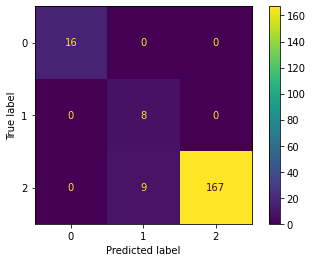

In [60]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [61]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.47      1.00      0.64         8
           2       1.00      0.95      0.97       176

    accuracy                           0.95       200
   macro avg       0.82      0.98      0.87       200
weighted avg       0.98      0.95      0.96       200



ERROR  FIND OUT

In [62]:
from sklearn import metrics 


#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse= 0.045
mae= 0.045
rmse= 0.21213203435596426


GNB

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 53)

In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [65]:
model.score(X_train, y_train)

0.9588888888888889

In [66]:
model.score(X_test, y_test)

0.95

In [67]:
y_pred = model.predict(X_test)



In [68]:
print(accuracy_score(y_test, y_pred))

0.95


In [69]:
recall=metrics.recall_score(y_test, y_pred, average='micro')
pre=metrics.precision_score(y_test, y_pred, average='macro')
f1=metrics.f1_score(y_test, y_pred, average='weighted')


In [70]:
print('recall=',recall)
print('precision=',pre)
print('f1=',f1)


recall= 0.95
precision= 0.7916666666666666
f1= 0.9606326422115896


In [71]:
metrics.recall_score(y_test, y_pred, labels=[1, 2], average='micro')


0.945054945054945

In [72]:
metrics.precision_score(y_test, y_pred, labels=[1, 2], average='macro')


0.6875

In [73]:
metrics.f1_score(y_test, y_pred, labels=[1, 2], average='weighted')

0.956739167265483

[[ 9  0  0]
 [ 0  3  0]
 [ 0  5 83]]


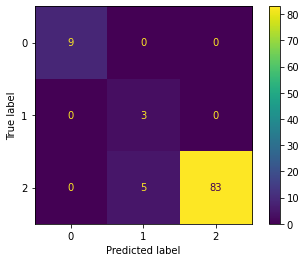

In [74]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [75]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.38      1.00      0.55         3
           2       1.00      0.94      0.97        88

    accuracy                           0.95       100
   macro avg       0.79      0.98      0.84       100
weighted avg       0.98      0.95      0.96       100



In [76]:
from sklearn import metrics 


#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse= 0.05
mae= 0.05
rmse= 0.22360679774997896


# **Multi-Layer Perceptron**

In [77]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=53)  # 70% training and 30% test

In [78]:
from sklearn.neural_network import MLPClassifier

In [79]:
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [80]:
model = clf.fit(X_train, y_train)

Iteration 1, loss = 33.85700568
Iteration 2, loss = 29.80254448
Iteration 3, loss = 6.07388665
Iteration 4, loss = 6.01276785
Iteration 5, loss = 16.46915382
Iteration 6, loss = 31.40037064
Iteration 7, loss = 6.00297776
Iteration 8, loss = 6.02002000
Iteration 9, loss = 17.70294674
Iteration 10, loss = 20.01165760
Iteration 11, loss = 5.94843452
Iteration 12, loss = 15.80178799
Iteration 13, loss = 9.35565873
Iteration 14, loss = 15.02193884
Iteration 15, loss = 5.92457567
Iteration 16, loss = 18.22003464
Iteration 17, loss = 13.86935305
Iteration 18, loss = 4.65492250
Iteration 19, loss = 22.70479216
Iteration 20, loss = 5.23478168
Iteration 21, loss = 6.63448730
Iteration 22, loss = 20.47415287
Iteration 23, loss = 5.53661273
Iteration 24, loss = 4.91934382
Iteration 25, loss = 17.92748196
Iteration 26, loss = 5.24174474
Iteration 27, loss = 4.89667846
Iteration 28, loss = 2.50190058
Iteration 29, loss = 0.79571838
Iteration 30, loss = 0.80837879
Iteration 31, loss = 0.81488505
Iter

In [81]:
model.score(X_train, y_train)

0.8388888888888889

In [82]:
model.score(X_test, y_test)

0.88

In [83]:
y_pred = model.predict(X_test)



In [84]:
print(accuracy_score(y_test, y_pred))

0.88


In [85]:
recall=metrics.recall_score(y_test, y_pred, average='micro')
pre=metrics.precision_score(y_test, y_pred, average='macro')
f1=metrics.f1_score(y_test, y_pred, average='weighted')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
print('recall=',recall)
print('precision=',pre)
print('f1=',f1)


recall= 0.88
precision= 0.29333333333333333
f1= 0.8238297872340425


In [87]:
metrics.recall_score(y_test, y_pred, labels=[1, 2], average='micro')


0.967032967032967

In [88]:
metrics.precision_score(y_test, y_pred, labels=[1, 2], average='macro')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.44

In [89]:
metrics.f1_score(y_test, y_pred, labels=[1, 2], average='weighted')

0.9053074584989478

[[ 0  0  9]
 [ 0  0  3]
 [ 0  0 88]]


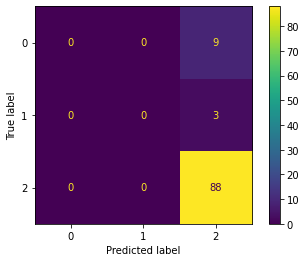

In [90]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [91]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         3
           2       0.88      1.00      0.94        88

    accuracy                           0.88       100
   macro avg       0.29      0.33      0.31       100
weighted avg       0.77      0.88      0.82       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
from sklearn import metrics 


#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse= 0.39
mae= 0.21
rmse= 0.6244997998398398
